# Brent Samaha - Assignment 4

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Q1. Read in dataset

In [39]:
data = pd.read_csv('credit_card_data.csv')

# Q2. Data exploration

In [40]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [41]:
data.drop(labels='CUST_ID', axis=1, inplace=True)

In [42]:
data.isna().sum()
#314 total instances of missing values

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [43]:
data[data['CREDIT_LIMIT'].isna()]
#This looks like a random case where a customer was not given a credit limit, maybe they recently applied, or they were
#denied of having any credit limit. 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [44]:
data[data['MINIMUM_PAYMENTS'].isna()]
#Looking at these customers, it appears that their minimum payments is NaN because they do not have a minimum payment
#they have to make, will change to 0.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [45]:
data = data.fillna(0)
data.head()
#changing all missing values to 0 for reasons explained above.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


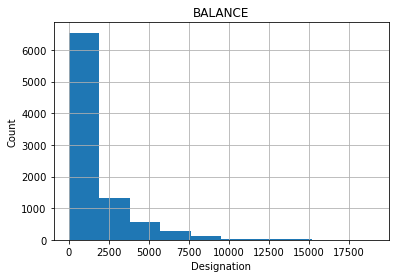

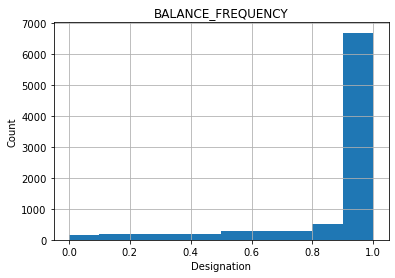

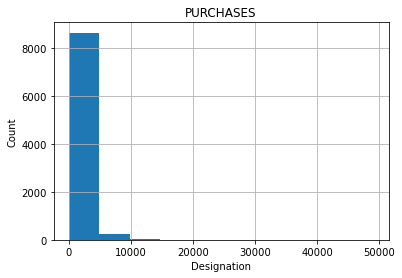

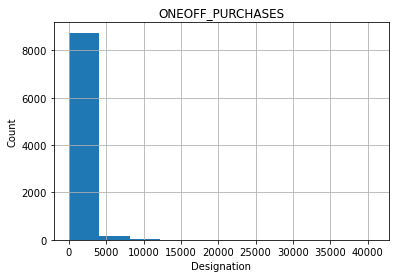

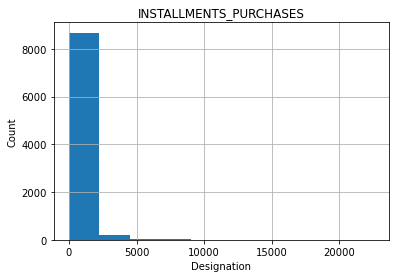

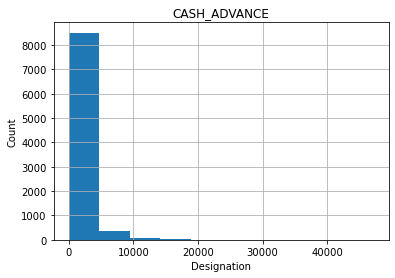

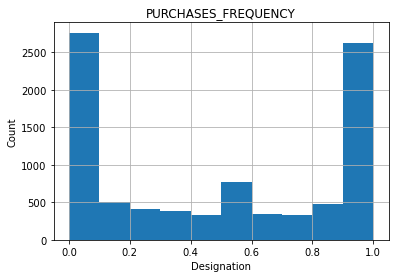

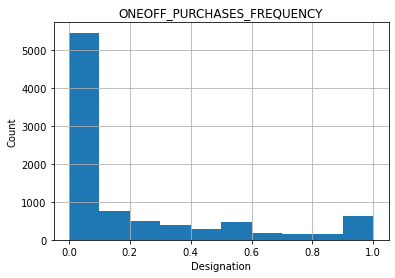

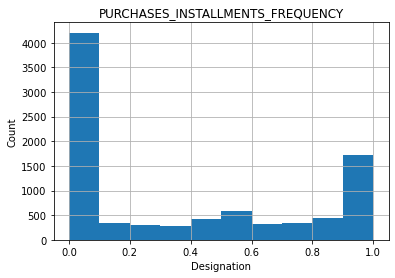

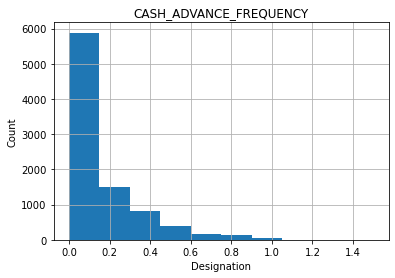

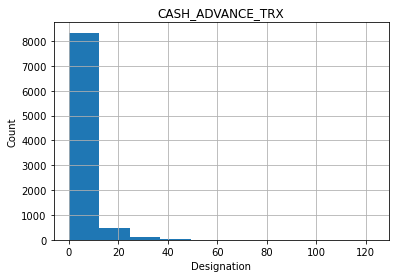

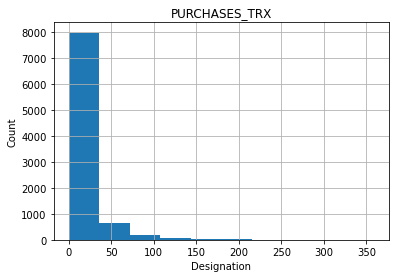

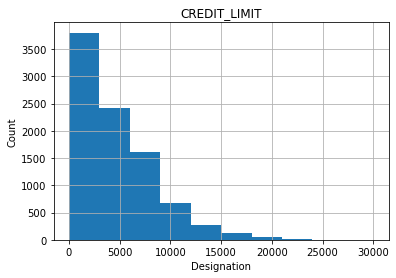

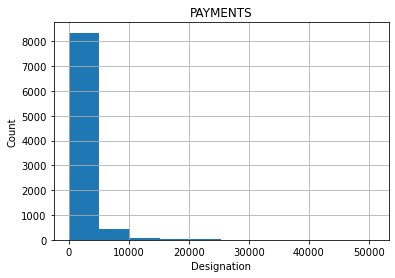

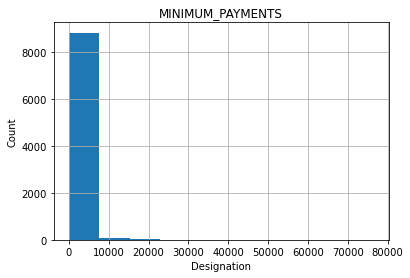

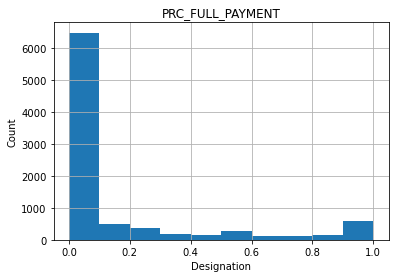

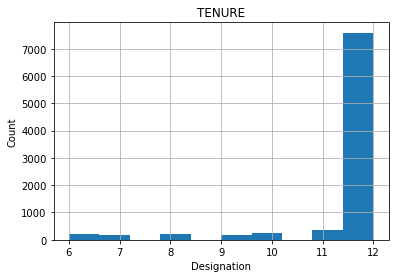

In [46]:
for x in data.columns:
    data[x].hist()
    plt.xlabel('Designation')
    plt.ylabel('Count')
    plt.title(x)
    plt.show()

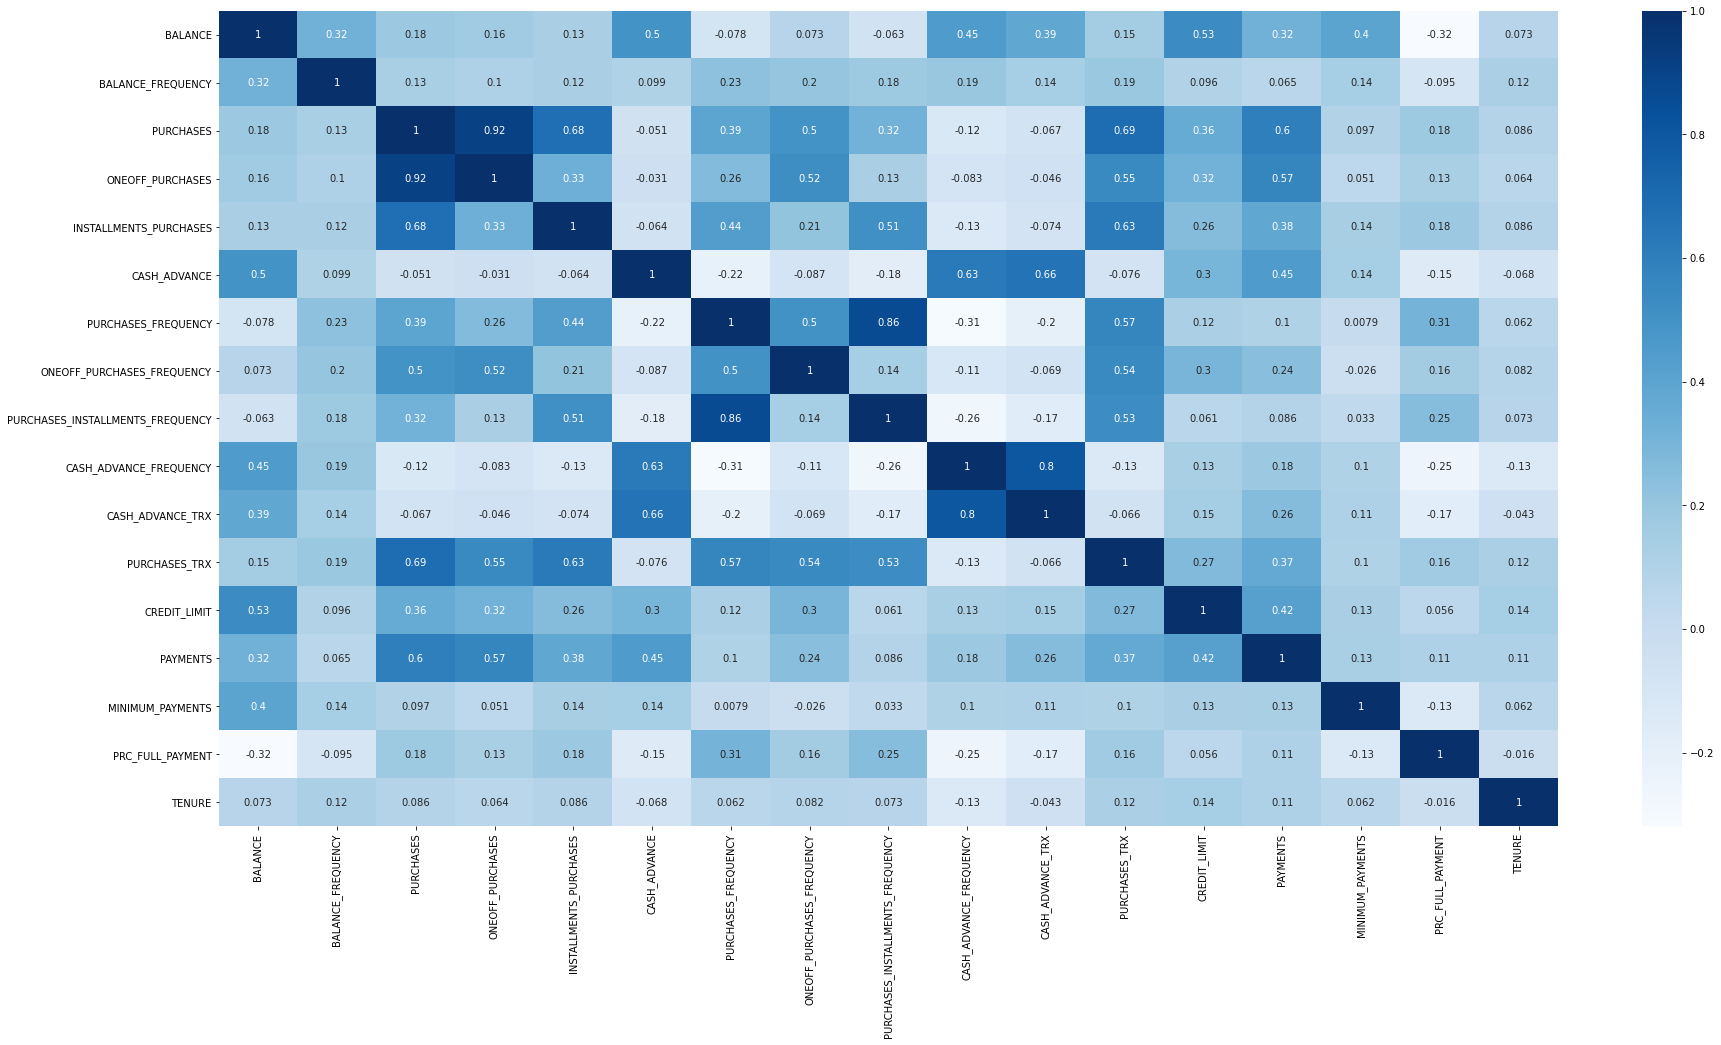

In [47]:
plt.figure(figsize=(30,15))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

#some strong correlations like Purchases and OneOff Purcahses; Purchase Installment Frequency and Purchases Frequency

# Q3. Run k-means with k: 2-20; find silhouette & elbow.

In [48]:
#scaling the data before clustering
data_scaled = (data - data.min()) / (data.max() - data.min())

In [49]:
data_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.033333,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.233333,0.080893,0.014035,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.250000,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.250000,0.000000,0.000000,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.040000,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.033333,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.033333,0.005439,0.000000,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.033333,0.001602,0.001079,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.016667,0.001036,0.000730,0.250000,0.0


In [50]:
from tqdm import tqdm
#wow I love this 

In [51]:
krange = range(2,21)
inertias=[]
silhouette=[]

for x in tqdm(krange):
    cluster_model = KMeans(n_clusters = x, random_state = 13).fit(data_scaled)                     
    inertias.append(cluster_model.inertia_)
    silhouette.append(metrics.silhouette_score(data_scaled, labels = cluster_model.labels_))

100%|██████████| 19/19 [00:27<00:00,  1.46s/it]


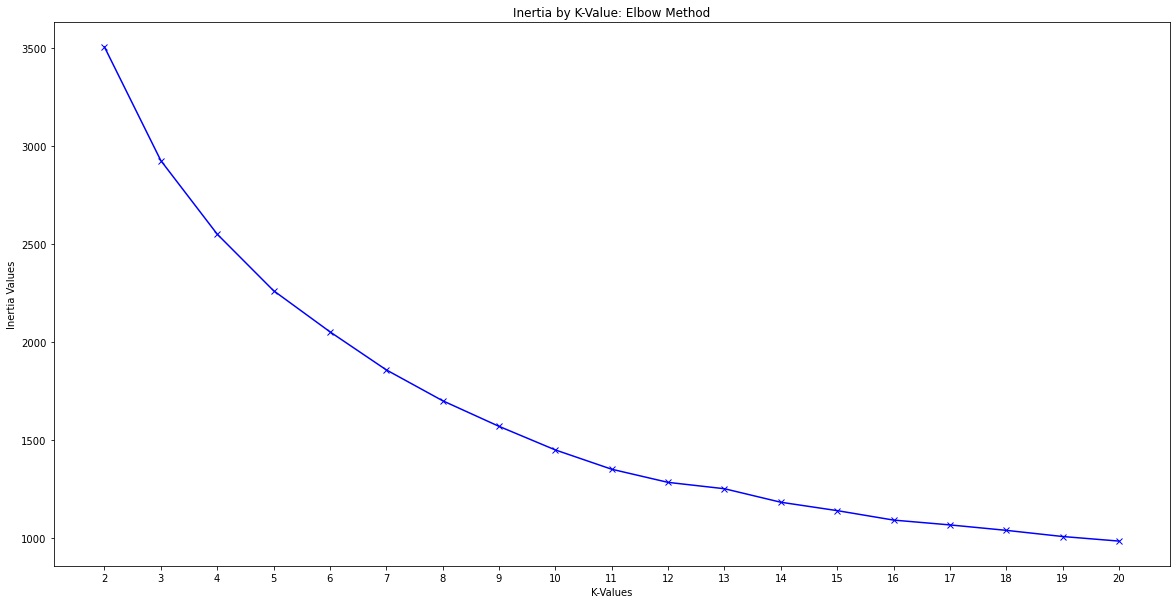

In [52]:
plt.figure(figsize=(20,10))
plt.plot(krange, inertias, 'bx-')
plt.title('Inertia by K-Value: Elbow Method')
plt.xlabel('K-Values')
plt.ylabel('Inertia Values')
plt.xticks(ticks=krange)
plt.show()

#Interpreting where the real elbow in this graph is difficult for me; I would guess k=11, 12, 13

In [53]:
for x, y in zip(krange, silhouette):
    print(x, ":", y)
    
#Best silhouette score is k=2, then k=3, and k=11
#Like discussed in our previous lab, for business reasons, using k=2 may not be best as we want to be able to cluster
#the customers for insight and optimized strategies. 

2 : 0.38667300698619295
3 : 0.3724696931613398
4 : 0.3214951058600543
5 : 0.319198499892657
6 : 0.3342226192984068
7 : 0.33734306528618435
8 : 0.3155820070734013
9 : 0.3344016074645209
10 : 0.3420565734473742
11 : 0.3507140605592272
12 : 0.321753175719554
13 : 0.3029906899765052
14 : 0.29996736296327536
15 : 0.3016861933442851
16 : 0.3051000708690271
17 : 0.30376648914574034
18 : 0.2942013084349632
19 : 0.29719892971796924
20 : 0.2965780346399831


# Q4. Calculate mean of each column in cluster and number of observations in each cluster with optimal K

In [54]:
#I am choosing K=11 as my optimal value because using the elbow method, K=11/12 seemed to me to be where the elbow is
#in the graph. Using the silhouette method, K=11 is the third best score. While K=2 and K=3 have better scores, 
#in this exercise I am not sure what is being measured, tested, or what anomalies are trying to be found. I believe that
#developing a model that has more clusters, allowing for more segmentation of credit customers is likely more usable 
#than using a cluster model of k=2 or k=3.

cluster_model = KMeans(n_clusters = 11, random_state = 13).fit(data_scaled)
cluster = data
cluster["KMeans_Cluster"] = cluster_model.labels_

In [55]:
#The number of observations in each cluster at K=11
cluster['KMeans_Cluster'].value_counts(sort=True)

1     2726
8     1310
2     1031
4      767
5      644
0      632
3      508
9      414
10     347
7      324
6      247
Name: KMeans_Cluster, dtype: int64

In [56]:
cluster.groupby(cluster.KMeans_Cluster).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans_Cluster,,,,,,,,,,,,,,,,,
0,3035.790220,0.989126,3871.423750,2507.745443,1363.678307,946.530290,0.967716,0.748094,0.847253,0.125314,3.501582,58.596519,7560.680380,3886.032675,1159.037280,0.062533,11.912975
1,2297.312411,0.976839,185.087869,168.449131,16.735803,1665.025693,0.073147,0.057177,0.015733,0.234425,5.736244,1.475055,4284.490540,1558.369354,1096.395599,0.020791,11.874908
2,1537.872302,0.920241,763.760213,320.746188,443.831765,733.594395,0.551253,0.118405,0.448776,0.103282,2.788555,11.048497,4315.005535,1362.049930,912.590356,0.057304,11.889428
3,122.138554,0.951722,1176.046969,181.255846,996.147382,41.459040,0.924043,0.070967,0.883729,0.006070,0.145669,21.124016,4140.506442,1269.741795,212.008522,0.789379,11.771654
4,177.551788,0.332910,289.138136,237.132099,52.096649,588.955065,0.132645,0.065520,0.064216,0.052241,1.143416,2.207301,3881.790526,1425.298686,158.489863,0.063273,11.741851
5,1818.305239,0.973831,1566.626925,1467.537019,99.532376,651.041597,0.740582,0.712013,0.093327,0.101814,2.307453,19.341615,5015.527950,1809.580295,721.544847,0.071261,11.799689
6,765.946681,0.877346,667.950931,210.727045,457.345344,860.006041,0.893572,0.109834,0.742256,0.132880,2.603239,11.093117,2309.716599,608.296515,400.685304,0.268299,7.218623
7,425.143171,0.979433,4501.845154,3399.240370,1102.604784,115.130782,0.955934,0.899415,0.536735,0.022809,0.611111,50.527778,7723.757015,4324.544571,246.404917,0.867956,11.867284
8,1467.737776,0.926509,1127.222542,257.045176,870.563252,644.097128,0.954449,0.088552,0.926049,0.080799,1.989313,24.525954,3927.022901,1553.733466,1293.443717,0.059862,11.934351


# Q5. Run PCA

In [57]:
pca_model = PCA(random_state = 13)

data_pca = pca_model.fit_transform(data_scaled)
data_pca = pd.DataFrame(data = data_pca, index = data_scaled.index)

data_pca_inverse = pca_model.inverse_transform(data_pca)
data_pca_inverse = pd.DataFrame(data=data_pca_inverse, \
                                   index=data_scaled.index)

In [58]:
pca_model.explained_variance_ratio_
#first component explained a large amount of variance, ~50%

array([4.96003498e-01, 1.40544409e-01, 1.28455581e-01, 7.67759776e-02,
       6.96412938e-02, 3.58469483e-02, 1.81762428e-02, 1.35268345e-02,
       6.54915904e-03, 5.50895584e-03, 2.84120024e-03, 1.85858581e-03,
       1.26685606e-03, 1.22629419e-03, 1.05823838e-03, 7.19893523e-04,
       3.12612558e-08])

# Q6. Find how many principle components are necessary to explain 95% of variance; repeat Q3 & explain silhouette.

In [59]:
explained = np.cumsum(pca_model.explained_variance_ratio_)

In [60]:
np.where(explained >= .95)[0].min()
#6 principle components are needed to explain 95% of variance

6

In [61]:
data_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.482159,-0.097598,-0.046484,-0.058268,0.110007,-0.171583,0.018466,0.016006,0.013141,0.023010,-0.002378,-0.010626,0.004736,-0.001316,-0.005778,-0.003331,-6.748747e-06
1,-0.608581,-0.019430,0.082087,-0.218774,-0.099004,0.136864,0.047604,0.001745,0.005822,-0.002425,0.057568,-0.031651,-0.040540,-0.015518,0.001752,-0.050883,1.382680e-07
2,0.304499,0.920924,0.012318,0.160074,0.162316,-0.158561,-0.007165,-0.277797,0.008456,-0.016614,-0.003772,-0.012035,-0.006777,0.015607,-0.014821,0.008081,9.343639e-07
3,-0.588633,-0.005707,0.037142,0.004507,0.223737,0.064952,0.095963,-0.020145,-0.041716,0.000012,-0.031173,0.029408,0.023673,-0.012689,-0.003696,-0.015155,-5.084814e-07
4,-0.554349,0.053041,-0.084181,-0.132817,-0.017034,-0.204406,0.056291,0.051689,0.019938,0.000571,0.014649,-0.010025,0.002835,-0.000469,-0.008334,0.004706,-3.420028e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.646925,-0.463068,0.210284,0.613441,-0.663612,-0.149683,0.086055,-0.083642,0.026621,0.013938,0.020586,-0.004051,0.011044,-0.009579,0.000057,0.012826,-7.298047e-06
8946,0.549897,-0.406668,-0.214381,0.779957,-0.505319,-0.193928,0.101211,-0.087892,-0.003463,0.047789,0.024442,-0.005708,0.010318,-0.007117,-0.000881,0.013080,-8.442267e-06
8947,0.360392,-0.422654,0.105833,0.744859,-0.480418,-0.135342,0.090345,-0.072690,0.022555,0.019634,0.014979,-0.007804,0.011717,-0.009604,0.001275,0.012207,-6.878693e-06
8948,-0.646091,-0.204377,0.281736,0.632908,-0.571252,-0.104895,0.095935,0.119185,-0.001048,-0.004882,-0.005786,-0.001768,0.002971,0.003073,0.002298,0.014287,-3.630721e-06


In [62]:
prin_comp = data_pca.iloc[:, :7]

In [63]:
prin_comp

,0,1,2,3,4,5,6
0,-0.482159,-0.097598,-0.046484,-0.058268,0.110007,-0.171583,0.018466
1,-0.608581,-0.019430,0.082087,-0.218774,-0.099004,0.136864,0.047604
2,0.304499,0.920924,0.012318,0.160074,0.162316,-0.158561,-0.007165
3,-0.588633,-0.005707,0.037142,0.004507,0.223737,0.064952,0.095963
4,-0.554349,0.053041,-0.084181,-0.132817,-0.017034,-0.204406,0.056291
...,...,...,...,...,...,...,...
8945,0.646925,-0.463068,0.210284,0.613441,-0.663612,-0.149683,0.086055
8946,0.549897,-0.406668,-0.214381,0.779957,-0.505319,-0.193928,0.101211
8947,0.360392,-0.422654,0.105833,0.744859,-0.480418,-0.135342,0.090345
8948,-0.646091,-0.204377,0.281736,0.632908,-0.571252,-0.104895,0.095935


In [64]:
krange = range(2,21)
inertias=[]
silhouette=[]

for x in tqdm(krange):
    cluster_model = KMeans(n_clusters = x, random_state = 13).fit(prin_comp)                     
    inertias.append(cluster_model.inertia_)
    silhouette.append(metrics.silhouette_score(data_scaled, labels = cluster_model.labels_))

100%|██████████| 19/19 [00:27<00:00,  1.44s/it]


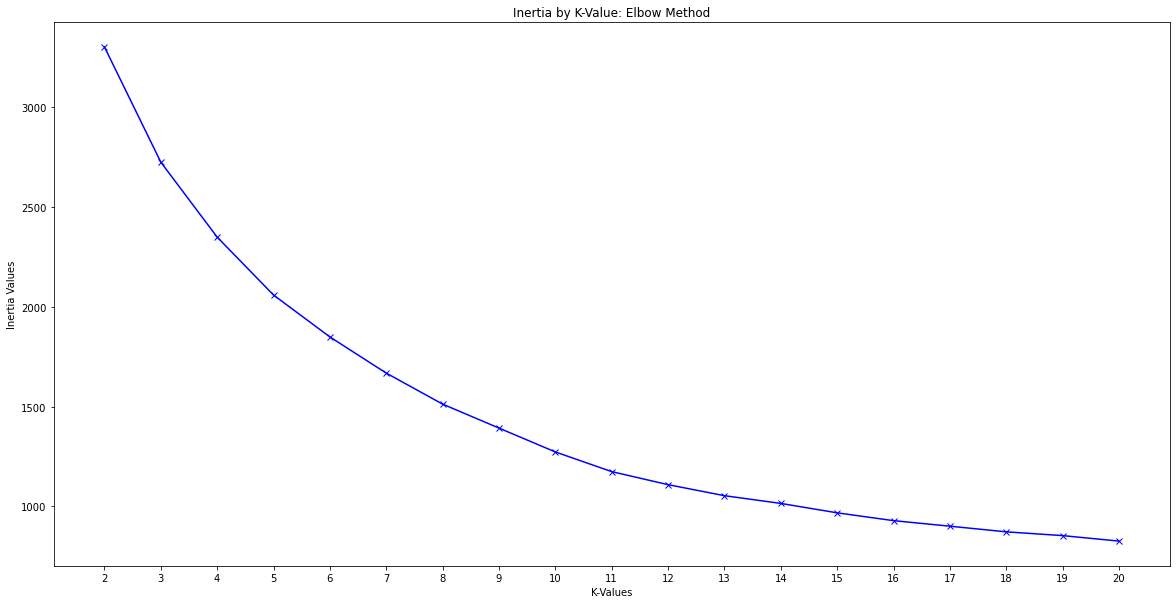

In [65]:
plt.figure(figsize=(20,10))
plt.plot(krange, inertias, 'bx-')
plt.title('Inertia by K-Value: Elbow Method')
plt.xlabel('K-Values')
plt.ylabel('Inertia Values')
plt.xticks(ticks=krange)
plt.show()

In [66]:
for x, y in zip(krange, silhouette):
    print(x, ":", y)

2 : 0.38671024927431047
3 : 0.3728585126312662
4 : 0.3218044791652506
5 : 0.319443032944219
6 : 0.33325253058302623
7 : 0.3081790844173392
8 : 0.3175010606583637
9 : 0.32621071611194546
10 : 0.34147899153143707
11 : 0.3503037642129425
12 : 0.32175282289439944
13 : 0.30491222060184514
14 : 0.32982602585534315
15 : 0.2986479261724338
16 : 0.30315200847571666
17 : 0.3020272390095024
18 : 0.2948704795699472
19 : 0.29804140503049675
20 : 0.2693924852521583


In [67]:
0.3507140605592272 - 0.3503037642129425

0.0004102963462846998

In [68]:
#As I chose K=11 as the optimal value, I see that the silhouette score for K=11 did increase by 0.0004102963462846998.
#I understand this increase in silhouette score to mean that intra-cluster points are more similar to each other and 
#each individual cluster is more different than each other compared to the model performed before PCA.

#I would explain that this increase makes sense because by using PCA, we are eliminating variables which reduces 
#correlations within the data. By removing correlations, multi-colinearlity issues are expected to be reduced, which
#can result in better performing clustering. 